# Importing the essential python libraries
some of these libraries used here are 
* pandas
* numpy
* matplot
* seaborn

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring all the warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset 

In [3]:
data = pd.read_csv('traffic.csv')

# looking at the top and the bottom of the data
for this we are using head() and tail() functions 

In [4]:
#printing the first 10 rows of the data
data.head(10)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041
5,01-11-2015 05:00,1,6,20151101051
6,01-11-2015 06:00,1,9,20151101061
7,01-11-2015 07:00,1,8,20151101071
8,01-11-2015 08:00,1,11,20151101081
9,01-11-2015 09:00,1,12,20151101091


In [5]:
# printing the last 10 rows of the data 
data.tail(10)

,DateTime,Junction,Vehicles,ID
48110,30-06-2017 14:00,4,10,20170630144
48111,30-06-2017 15:00,4,14,20170630154
48112,30-06-2017 16:00,4,16,20170630164
48113,30-06-2017 17:00,4,16,20170630174
48114,30-06-2017 18:00,4,17,20170630184
48115,30-06-2017 19:00,4,11,20170630194
48116,30-06-2017 20:00,4,30,20170630204
48117,30-06-2017 21:00,4,16,20170630214
48118,30-06-2017 22:00,4,22,20170630224
48119,30-06-2017 23:00,4,12,20170630234


In [6]:
# provides the rows and columns of the table
data.shape

(48120, 4)

this means there are 48120 rows and 4 columns in the table 

# Data Identification process 

In [7]:
# this provide us the useful information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Data Cleaning

In [8]:
# the following will provide us the null values in the table
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [9]:
# similarly for duplicate values
data.duplicated().sum()

0

These both process or procedure show that the data is already cleanned and ready to use

# EDA PROCESSES
This process provides the statastical information about the data , thus it gives the statastical values of the mean, mode and median of the data i.e. the central tendancy of the data, along with the standard deviation and the variance of the data 

we may use seperate functions to find this available in numpy but there is a collective function also available in the python which performs the same process using describe() function

In [10]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [11]:
# just applying the '.T' at the lastr will provide us the transisted table of the above table
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Junction,48120.0,2.180549e+00,9.669554e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Vehicles,48120.0,2.279133e+01,2.075006e+01,1.000000e+00,9.000000e+00,1.500000e+01,2.900000e+01,1.800000e+02
ID,48120.0,2.016330e+10,5.944854e+06,2.015110e+10,2.016042e+10,2.016093e+10,2.017023e+10,2.017063e+10


In [12]:
data.groupby('Junction')['Vehicles'].describe().T

Junction,1,2,3,4
count,14592.000000,14592.000000,14592.000000,4344.000000
mean,45.052906,14.253221,13.694010,7.251611
std,23.008345,7.401307,10.436005,3.521455
min,5.000000,1.000000,1.000000,1.000000
25%,27.000000,9.000000,7.000000,5.000000
50%,40.000000,13.000000,11.000000,7.000000
75%,59.000000,17.000000,18.000000,9.000000
max,156.000000,48.000000,180.000000,36.000000


This dataset provides traffic statistics for four different junctions (1, 2, 3, and 4). Here's a simple explanation of each value:

## General Overview:
* count: Number of observations (data points) recorded for each junction.
* Junctions 1, 2, and 3 have 14,592 records each.
* Junction 4 has fewer observations, with 4,344 records.

## Central Tendencies (Average Traffic Volume):
* mean: Average number of vehicles observed per time interval.
* Junction 1: 45.05 vehicles on average.
* Junction 2: 14.25 vehicles on average.
* Junction 3: 13.69 vehicles on average.
* Junction 4: 7.25 vehicles on average.

## Spread of the Data (Traffic Variability):
* std (Standard Deviation): Measure of how much traffic counts vary around the mean.
* Traffic at Junction 1 varies the most (±23 vehicles).
* Junctions 2 and 3 have moderate variability (~7.4 and ~10.4 vehicles, respectively).
* Junction 4 has the least variability (±3.5 vehicles).

## Minimum and Maximum Traffic:
* min: Lowest number of vehicles observed.
* Junctions 2, 3, and 4 recorded at least 1 vehicle at their quietest time.
* Junction 1 recorded a minimum of 5 vehicles.

* max: Highest number of vehicles observed.
* Junction 1 saw up to 156 vehicles.
* Junction 2: 48 vehicles.
* Junction 3: 180 vehicles (likely indicating a high spike).
* Junction 4: 36 vehicles.

## Quartiles (Traffic Distribution):
25% (1st Quartile): 25% of the time, traffic was below this level.

E.g., at Junction 1, traffic was ≤ 27 vehicles for 25% of the time.
50% (Median): Half the observations are below this value.

E.g., at Junction 1, the median traffic count is 40 vehicles.
75% (3rd Quartile): 75% of the time, traffic was below this level.

E.g., at Junction 1, 75% of the time, traffic was ≤ 59 vehicles.

## Key Insights:
* Junction 1 has the highest traffic on average and the widest variability, indicating it's likely the busiest and most dynamic junction.
* Junction 4 experiences the least traffic, with a smaller range of values and lower peak traffic.
* Junction 3 shows some high traffic spikes, as seen in its maximum value (180 vehicles).

# Visualixing the data

Here are some additional visualizations to help you understand the data better:

# Importing scikit-learn library 
it is an essntial library which enable us to use the Machine Learning or ML algorithms

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature Engineering 
here we are making new columns extracting through previously available column data 

in this data we are making three new columns - hour, day_of_week, month 

In [14]:
# Extract date-time features with the correct format
data['hour'] = pd.to_datetime(data['DateTime'], dayfirst=True).dt.hour
data['day_of_week'] = pd.to_datetime(data['DateTime'], dayfirst=True).dt.dayofweek
data['month'] = pd.to_datetime(data['DateTime'], dayfirst=True).dt.month

# Select features and target variable
X = data[['hour', 'day_of_week', 'month', 'Junction']]
y = data['Vehicles']

# Split Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Make Predictions

In [17]:
# Predict on test data
y_pred = rf.predict(X_test)


# Evaluate the model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 8.21298382037001
Mean Squared Error: 145.87743733257156
Root Mean Squared Error: 12.07797322950219


# Visulaize the result

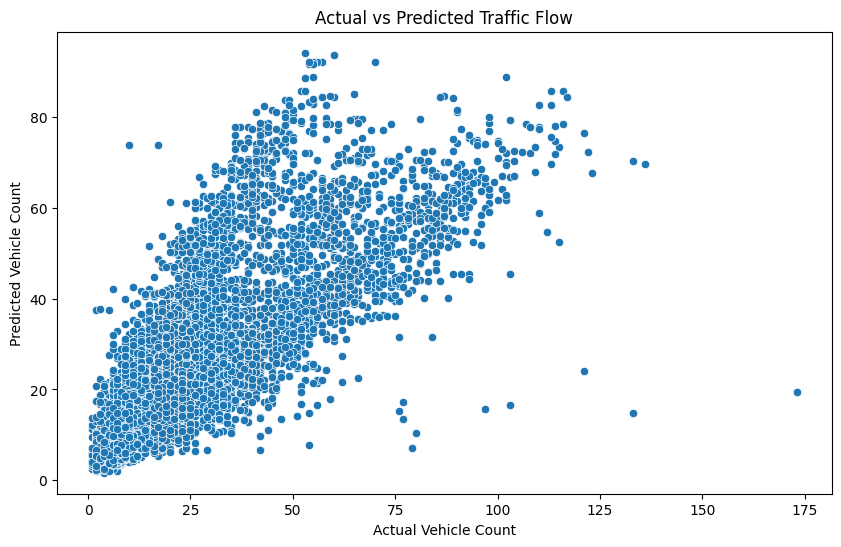

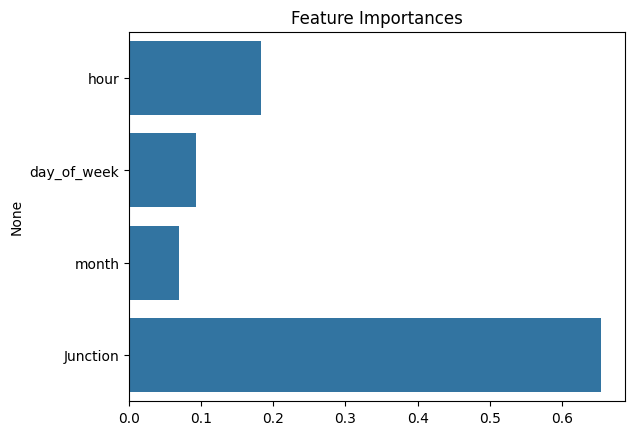

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("Actual vs Predicted Traffic Flow")
plt.show()

# Feature importance visualization
importances = rf.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


## Traffic Volume Distribution by Junction
This will show how traffic is distributed across all junctions.

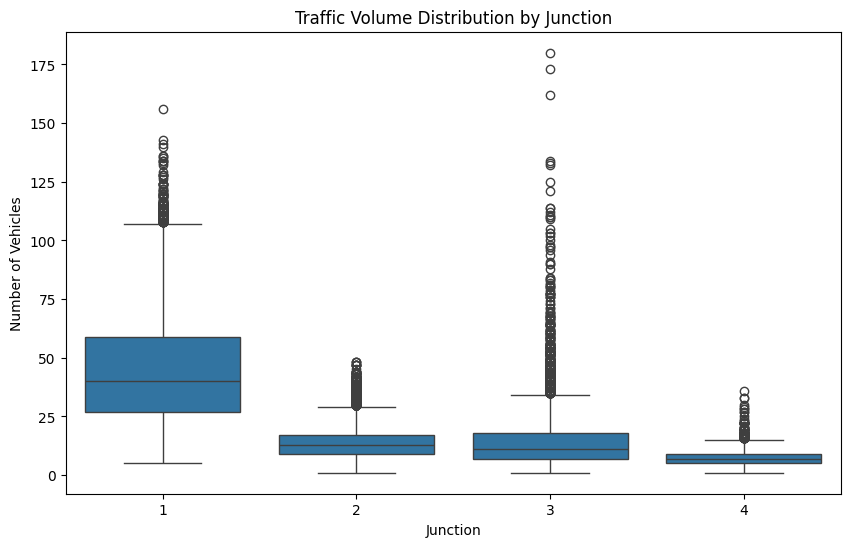

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution of traffic volume for each junction
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Vehicles']].join(data['Junction'].astype(str)), x='Junction', y='Vehicles')
plt.title('Traffic Volume Distribution by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()


## Time Series Plot for Traffic Trends
If the DateTime column spans multiple days, you can visualize how traffic changes over time.

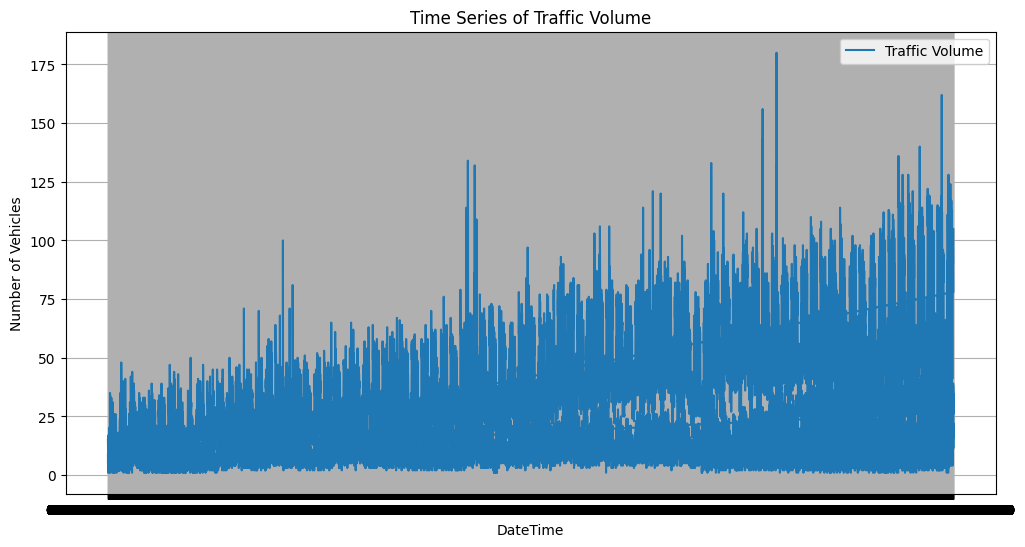

In [21]:
import matplotlib.pyplot as plt

# Plot the time series of vehicle counts
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Vehicles'], label='Traffic Volume')
plt.title('Time Series of Traffic Volume')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.show()


## Heatmap of Traffic by Hour and Day of the Week
This will help you identify peak hours and days for traffic.

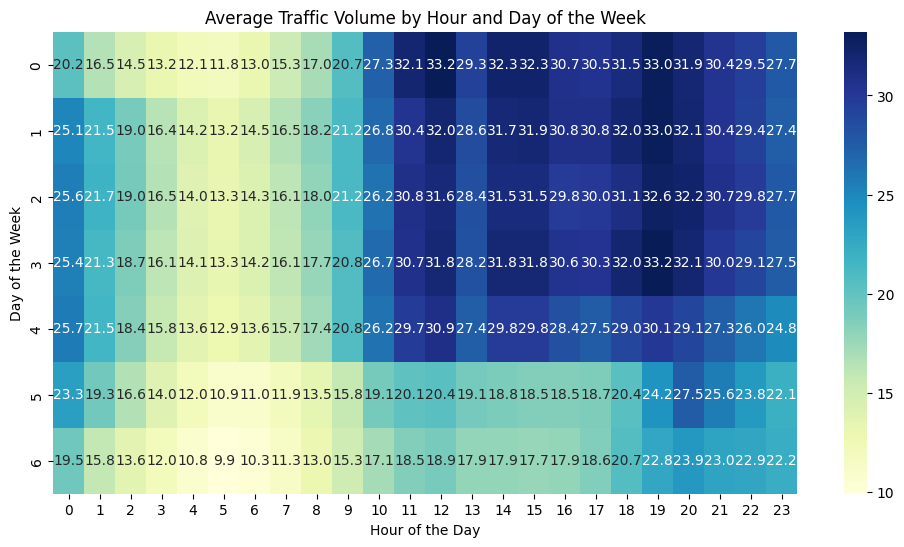

In [22]:
import seaborn as sns

# Pivot data for heatmap
pivot_data = data.pivot_table(values='Vehicles', index='day_of_week', columns='hour', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Traffic Volume by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

### Save Your Trained Model

In [25]:
import os
import joblib

# Step 1: Create the folder if it doesn't exist
os.makedirs('model', exist_ok=True)

# Step 2: Save your trained model (assuming it's called `rf`)
joblib.dump(rf, 'model/model.pkl')

['model/model.pkl']